## Collatz beta notebook

In [73]:
"""
This notebook analyses the betas of collatz sequences and their relationship
to other components.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from fractions import Fraction
import random as rnd
import matplotlib.pyplot as plt
from math import log2
import pandas as pd
from collatz import commons as com
from collatz import generator as gen


# Configuration
k = 3
max_value = 101
max_iterations = 30
start_value = rnd.randint(1, max_value)

if start_value % 2 == 0:
    start_value = start_value + 1

# start_value = 31

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate Collatz sequence
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=start_value, k=k, max_iterations=max_iterations)

# Drop last row
analysis_frame = analysis_frame[:-1]

# Derive additional fields
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame.insert(1, "v_1", [start_value] * len(analysis_frame))

# Calculate alpha
analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_max"] = analysis_frame["n"] * log2(k) + log2(start_value)
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

# Calculate beta
analysis_frame["beta_i"] = 1 + 1/(k*analysis_frame["collatz"])
analysis_frame["beta"] = analysis_frame["beta_i"].cumprod()
analysis_frame["beta_log"] = analysis_frame["beta"].apply(log2)
analysis_frame["beta_log_max"] = analysis_frame["alpha_max"] - \
                             analysis_frame["n"] * log2(k) - log2(start_value)

analysis_frame["beta_log_cycle"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1 - \
                                   analysis_frame["n"] * log2(k)

analysis_frame["beta_max"] = 2**analysis_frame["beta_log_max"]
analysis_frame["beta_cycle"] = 2**analysis_frame["beta_log_cycle"]

analysis_frame["beta_frac"] = analysis_frame["beta"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_max_frac"] = analysis_frame["beta_max"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_cycle_frac"] = analysis_frame["beta_cycle"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

# Print results
print_frame = analysis_frame[[
    "n", "collatz","next_odd",
    "beta", "beta_max", "beta_cycle", 
    "beta_frac", "beta_max_frac", "beta_cycle_frac"
]]

print_frame.columns = ["n","v_i", "v_i+",
                       "b", "b_max", "b_cycle", 
                       "b_frac", "b_max_frac", "b_cycle_frac"]

final_beta = analysis_frame["beta"][len(analysis_frame)-1]

print("Start value:", start_value, " K:", k, 
      " Final beta:", final_beta, 
      "\n")

print(print_frame.to_string(index=False), "\n")

Start value: 51  K: 3  Final beta: 1.1751436742964216 

 n  v_i  v_i+         b     b_max   b_cycle         b_frac     b_max_frac b_cycle_frac
 1   51    77  1.006536  1.673203  1.333333        154/153        256/153          4/3
 2   77    29  1.010893  1.115468  1.777778        464/459        512/459         16/9
 3   29    11  1.022513  1.487291  1.185185      1408/1377      2048/1377        32/27
 4   11    17  1.053498  1.983055  1.580247        256/243      8192/4131       128/81
 5   17    13  1.074155  1.322037  1.053498    13312/12393    16384/12393      256/243
 6   13     5  1.101697  1.762716  1.404664    40960/37179    65536/37179     1024/729
 7    5     1  1.175144  1.175144  1.872885  131072/111537  131072/111537    4096/2187 



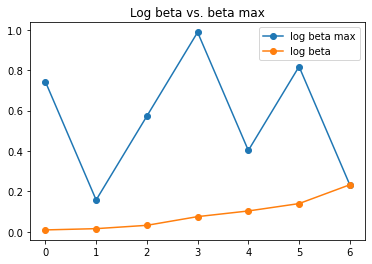

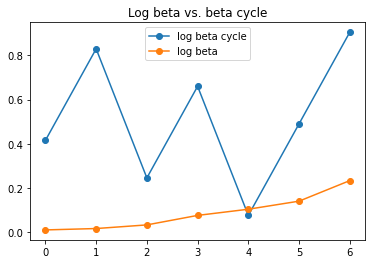

In [74]:
# Plot results
plt.figure()
plt.title("Log beta vs. beta max")
plt.plot(analysis_frame["beta_log_max"], "-o", label="log beta max")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()

plt.figure()
plt.title("Log beta vs. beta cycle")
plt.plot(analysis_frame["beta_log_cycle"], "-o", label="log beta cycle")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()
plt.show()
